##### Importing Sklearn Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

##### Importing the Titanic dataset

In [2]:
titanic = pd.read_csv('Titanic.csv')
print('Titanic Shape = ', titanic.shape)
titanic.head(10)


Titanic Shape =  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### Data Cleaning Process

In [3]:
titanic.Cabin.isnull().sum()

687

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic = titanic.drop('Cabin', axis = 'columns')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [6]:
le = LabelEncoder()
titanic.Ticket = le.fit_transform(titanic['Ticket'])

In [7]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,523,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,596,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,669,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,49,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,472,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,275,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,85,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,395,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,344,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,132,30.0708,C


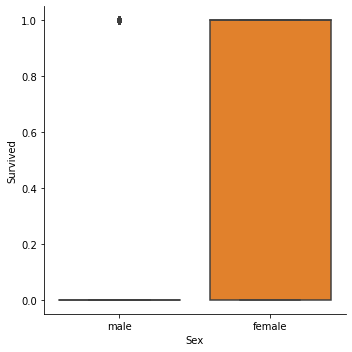

In [8]:
 sns.catplot(x = 'Sex', y = 'Survived', kind = 'box', data = titanic);

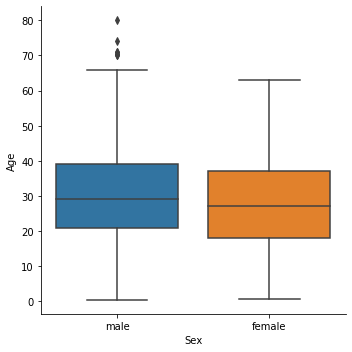

In [9]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = titanic);

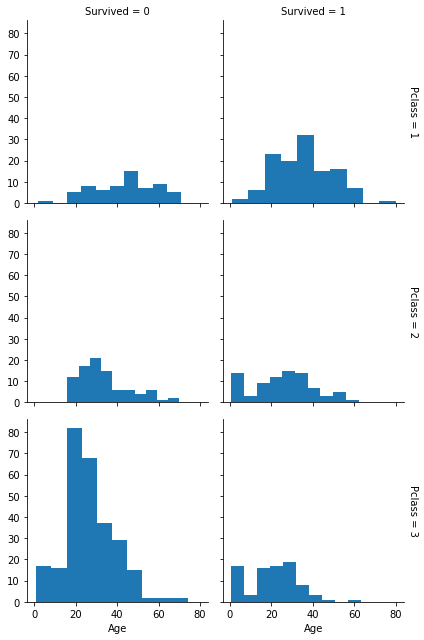

In [10]:
g = sns.FacetGrid(titanic, col = 'Survived',row = 'Pclass', margin_titles = True)
g.map(plt.hist, 'Age');


In [11]:
titanic = titanic.drop('Ticket', axis = 'columns')

In [12]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [13]:
titanic['Name'] = le.fit_transform(titanic['Name'])

In [14]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,108,male,22.0,1,0,7.2500,S
1,2,1,1,190,female,38.0,1,0,71.2833,C
2,3,1,3,353,female,26.0,0,0,7.9250,S
3,4,1,1,272,female,35.0,1,0,53.1000,S
4,5,0,3,15,male,35.0,0,0,8.0500,S
5,6,0,3,554,male,NaN,0,0,8.4583,Q
6,7,0,1,515,male,54.0,0,0,51.8625,S
7,8,0,3,624,male,2.0,3,1,21.0750,S
8,9,1,3,412,female,27.0,0,2,11.1333,S
9,10,1,2,576,female,14.0,1,0,30.0708,C


In [15]:
titanic['Fare'].isnull().sum()

0

In [16]:
titanic['Sex'] = titanic['Sex'].replace({'male': 1, 'female': 0})

In [17]:
titanic['Age'] = titanic['Age'].fillna(0.0)

In [18]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,7.2500,S
1,2,1,1,190,0,38.0,1,0,71.2833,C
2,3,1,3,353,0,26.0,0,0,7.9250,S
3,4,1,1,272,0,35.0,1,0,53.1000,S
4,5,0,3,15,1,35.0,0,0,8.0500,S
5,6,0,3,554,1,0.0,0,0,8.4583,Q
6,7,0,1,515,1,54.0,0,0,51.8625,S
7,8,0,3,624,1,2.0,3,1,21.0750,S
8,9,1,3,412,0,27.0,0,2,11.1333,S
9,10,1,2,576,0,14.0,1,0,30.0708,C


In [19]:
titanic['Age'] = titanic['Age'].replace(0.0, np.mean(titanic['Age']))

In [20]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,108,1,22.000000,1,0,7.2500,S
1,2,1,1,190,0,38.000000,1,0,71.2833,C
2,3,1,3,353,0,26.000000,0,0,7.9250,S
3,4,1,1,272,0,35.000000,1,0,53.1000,S
4,5,0,3,15,1,35.000000,0,0,8.0500,S
5,6,0,3,554,1,23.799293,0,0,8.4583,Q
6,7,0,1,515,1,54.000000,0,0,51.8625,S
7,8,0,3,624,1,2.000000,3,1,21.0750,S
8,9,1,3,412,0,27.000000,0,2,11.1333,S
9,10,1,2,576,0,14.000000,1,0,30.0708,C


In [21]:
titanic['Age'] = le.fit_transform(titanic['Age'])
titanic['Fare'] = le.fit_transform(titanic['Fare'])
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,108,1,28,1,0,18,S
1,2,1,1,190,0,52,1,0,207,C
2,3,1,3,353,0,35,0,0,41,S
3,4,1,1,272,0,48,1,0,189,S
4,5,0,3,15,1,48,0,0,43,S
5,6,0,3,554,1,31,0,0,51,Q
6,7,0,1,515,1,70,0,0,186,S
7,8,0,3,624,1,6,3,1,124,S
8,9,1,3,412,0,36,0,2,74,S
9,10,1,2,576,0,18,1,0,154,C


In [22]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
titanic['Embarked'].shape

(891,)

In [25]:
titanic['Embarked'] = titanic['Embarked'].replace(np.nan, 'A')

In [26]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', 'A'], dtype=object)

In [27]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,108,1,28,1,0,18,S
1,2,1,1,190,0,52,1,0,207,C
2,3,1,3,353,0,35,0,0,41,S
3,4,1,1,272,0,48,1,0,189,S
4,5,0,3,15,1,48,0,0,43,S
5,6,0,3,554,1,31,0,0,51,Q
6,7,0,1,515,1,70,0,0,186,S
7,8,0,3,624,1,6,3,1,124,S
8,9,1,3,412,0,36,0,2,74,S
9,10,1,2,576,0,18,1,0,154,C


In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null int32
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int64
Embarked       891 non-null object
dtypes: int32(1), int64(8), object(1)
memory usage: 66.2+ KB


In [29]:
titanic.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,37.810325,0.523008,0.381594,105.355780
std,257.353842,0.486592,0.836071,257.353842,0.477990,17.008489,1.102743,0.806057,70.082521
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,28.000000,0.000000,0.000000,40.500000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,32.000000,0.000000,0.000000,94.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,48.000000,1.000000,0.000000,157.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,88.000000,8.000000,6.000000,247.000000


In [30]:
titanic['Embarked'] = titanic['Embarked'].replace({'S':0, 'C':1, 'Q': 2, 'A': 3})

##### Determing target/dependent feature is denoted by 'y'
##### and independent features is denoted by 'X'

In [31]:
y = np.array(titanic['Survived'])
y = y.reshape(-1,1)

In [32]:
X =  titanic.iloc[:, titanic.columns != 'Survived']

In [33]:
X.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,108,1,28,1,0,18,0
1,2,1,190,0,52,1,0,207,1
2,3,3,353,0,35,0,0,41,0
3,4,1,272,0,48,1,0,189,0
4,5,3,15,1,48,0,0,43,0
5,6,3,554,1,31,0,0,51,2
6,7,1,515,1,70,0,0,186,0
7,8,3,624,1,6,3,1,124,0
8,9,3,412,0,36,0,2,74,0
9,10,2,576,0,18,1,0,154,1


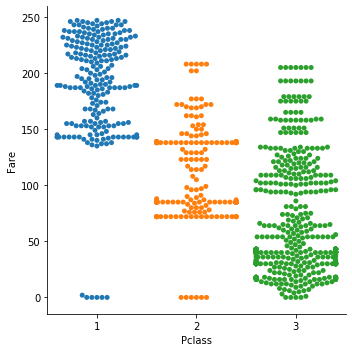

In [34]:
sns.catplot(x ='Pclass', y = 'Fare', kind = 'swarm', data = titanic)

##### Splitting of dataset with test_size 0.3
##### i.e, training data_size = 70 % and testing data_size = 30%

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

In [36]:
len(X_train)

623

In [37]:
len(X_test)

268

##### Standardizing the dataset using StandardScaler()

In [38]:
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Applying GridSearchCV (hypertuning parameter)
##### to find the best suited algorithm for determining people Survived
##### after the ship(titanic) crash

##### Support Vector Machines

In [41]:
svm = GridSearchCV(SVC(gamma = 'auto'),{
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv = 2, return_train_score = False)

svm.fit(X_train, y_train)
svm.cv_results_

{'mean_fit_time': array([0.11768281, 0.00948036, 0.01446295, 0.0458777 , 0.01595628,
        0.09424722]),
 'std_fit_time': array([0.11070478, 0.00449288, 0.00249267, 0.02692699, 0.00199378,
        0.0633322 ]),
 'mean_score_time': array([0.00498748, 0.00797844, 0.0094744 , 0.00349092, 0.00448859,
        0.00349081]),
 'std_score_time': array([2.38418579e-07, 4.98652458e-03, 4.48620319e-03, 4.98771667e-04,
        4.98652458e-04, 4.99129295e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [42]:
dfsvm = pd.DataFrame(svm.cv_results_)
dfsvm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.117683,0.110705,0.004987,2.384186e-07,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.810897,0.797428,0.804173,0.006735,1
1,0.009480,0.004493,0.007978,4.986525e-03,1,linear,"{'C': 1, 'kernel': 'linear'}",0.804487,0.800643,0.802568,0.001922,2
2,0.014463,0.002493,0.009474,4.486203e-03,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.798077,0.771704,0.784912,0.013186,5
3,0.045878,0.026927,0.003491,4.987717e-04,10,linear,"{'C': 10, 'kernel': 'linear'}",0.804487,0.800643,0.802568,0.001922,2
4,0.015956,0.001994,0.004489,4.986525e-04,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.798077,0.758842,0.778491,0.019617,6
5,0.094247,0.063332,0.003491,4.991293e-04,20,linear,"{'C': 20, 'kernel': 'linear'}",0.804487,0.800643,0.802568,0.001922,2


In [43]:
dfsvm[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.804173
1,1,linear,0.802568
2,10,rbf,0.784912
3,10,linear,0.802568
4,20,rbf,0.778491
5,20,linear,0.802568


In [46]:
dir(svm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score',
 'scorer_',
 'scoring',
 '

In [52]:
svm.score

<bound method ClassifierMixin.score of SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>

In [48]:
svm = SVC(C = 10, kernel = 'rbf')

In [49]:
svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
svm.score(X_test, y_test)

0.8134328358208955

In [51]:
acc_svm = round(svm.score(X_test, y_test) * 100, 2)
acc_svm

81.34

In [209]:
y_predsvm = svm.predict(X_test)

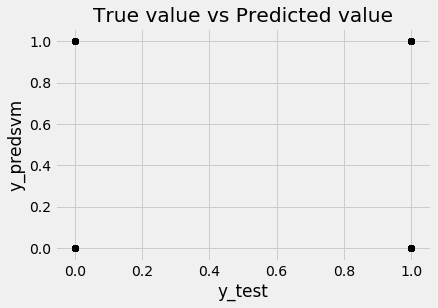

In [210]:
plt.scatter(y_test, y_predsvm, color = 'black')
plt.xlabel('y_test')
plt.ylabel('y_predsvm')
plt.title('True value vs Predicted value')
plt.grid(True)
plt.style.use('fivethirtyeight')

##### Logistic Regression

In [61]:
logistic = GridSearchCV(LogisticRegression(),{
    'C': [1.0,50.0],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'multi_class': ['auto', 'multinomial']
}, cv = 2, return_train_score = False)
logistic.fit(X_train, y_train)
logistic.cv_results_

{'mean_fit_time': array([0.1505971 , 0.1071955 , 0.02042627, 0.00398862, 0.12067723,
        0.0104779 , 0.00847864, 0.00348592, 0.01495957, 0.00598419,
        0.00498569, 0.00448716, 0.02044511, 0.00847673, 0.0069803 ,
        0.00299108]),
 'std_fit_time': array([1.38629675e-01, 1.03240609e-01, 1.74381733e-02, 9.97424126e-04,
        8.77661705e-02, 4.89354134e-04, 4.96625900e-04, 4.95910645e-04,
        2.38418579e-07, 9.97662544e-04, 1.19209290e-07, 5.00559807e-04,
        3.49044800e-03, 4.97341156e-04, 9.97900963e-04, 5.96046448e-07]),
 'mean_score_time': array([0.00049829, 0.00101674, 0.00049877, 0.00049853, 0.00049829,
        0.00099516, 0.00049829, 0.00049973, 0.        , 0.00049877,
        0.00049913, 0.        , 0.00049877, 0.00049889, 0.00099826,
        0.00099802]),
 'std_score_time': array([4.98294830e-04, 1.84774399e-05, 4.98771667e-04, 4.98533249e-04,
        4.98294830e-04, 2.38418579e-06, 4.98294830e-04, 4.99725342e-04,
        0.00000000e+00, 4.98771667e-04, 4.99

In [62]:
dflogistic = pd.DataFrame(logistic.cv_results_)
dflogistic.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_multi_class,param_solver,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.150597,0.138630,0.000498,0.000498,1,auto,newton-cg,"{'C': 1.0, 'multi_class': 'auto', 'solver': 'n...",0.782051,0.803859,0.792937,0.010904,1
1,0.107195,0.103241,0.001017,0.000018,1,auto,lbfgs,"{'C': 1.0, 'multi_class': 'auto', 'solver': 'l...",0.782051,0.803859,0.792937,0.010904,1
2,0.020426,0.017438,0.000499,0.000499,1,auto,sag,"{'C': 1.0, 'multi_class': 'auto', 'solver': 's...",0.782051,0.803859,0.792937,0.010904,1
3,0.003989,0.000997,0.000499,0.000499,1,auto,saga,"{'C': 1.0, 'multi_class': 'auto', 'solver': 's...",0.782051,0.803859,0.792937,0.010904,1
4,0.120677,0.087766,0.000498,0.000498,1,multinomial,newton-cg,"{'C': 1.0, 'multi_class': 'multinomial', 'solv...",0.778846,0.803859,0.791332,0.012506,5


In [63]:
dflogistic[['param_C', 'param_solver','param_multi_class', 'mean_test_score']]

,param_C,param_solver,param_multi_class,mean_test_score
0,1,newton-cg,auto,0.792937
1,1,lbfgs,auto,0.792937
2,1,sag,auto,0.792937
3,1,saga,auto,0.792937
4,1,newton-cg,multinomial,0.791332
5,1,lbfgs,multinomial,0.791332
6,1,sag,multinomial,0.791332
7,1,saga,multinomial,0.791332
8,50,newton-cg,auto,0.789727
9,50,lbfgs,auto,0.789727


In [71]:
dir(logistic)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

In [72]:
logistic.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [73]:
logistic = LogisticRegression()

In [74]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
logistic.score(X_test, y_test)

0.7798507462686567

In [76]:
acc_logistic = round(logistic.score(X_test, y_test) * 100, 2)
acc_logistic

77.99

In [206]:
y_predlogistic = logistic.predict(X_test)

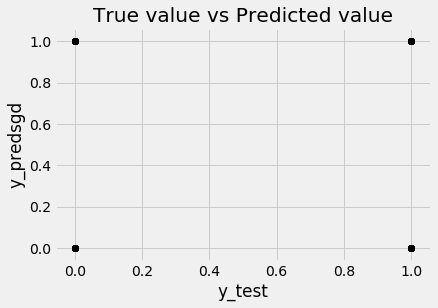

In [208]:
plt.scatter(y_test, y_predlogistic, color = 'black')
plt.xlabel('y_test')
plt.ylabel('y_predsgd')
plt.title('True value vs Predicted value')
plt.grid(True)
plt.style.use('fivethirtyeight')

##### Random Forest Classifier

In [81]:
rfc =  GridSearchCV(RandomForestClassifier(),{
    'n_estimators': [100,150,200],
    'criterion': ['gini', 'entropy']
}, cv = 2, return_train_score = False)
rfc.fit(X_train, y_train)
rfc.cv_results_

{'mean_fit_time': array([0.21542513, 0.31067455, 0.33560479, 0.16805112, 0.22391784,
        0.39442849]),
 'std_fit_time': array([0.08078516, 0.02841818, 0.03839934, 0.00648487, 0.01544225,
        0.01647282]),
 'mean_score_time': array([0.01495779, 0.0363971 , 0.04487777, 0.01396251, 0.01994932,
        0.04587924]),
 'std_score_time': array([9.95755196e-04, 1.54527426e-02, 1.59554482e-02, 0.00000000e+00,
        2.26497650e-06, 4.98473644e-03]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 150, 200, 100, 150, 200],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'n_estimators': 100},
  {'criterion': 'gini', 'n_estimators': 150},
  {'criterion': 'gini', 

In [82]:
dfrfc = pd.DataFrame(rfc.cv_results_)
dfrfc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.215425,0.080785,0.014958,0.000996,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.785256,0.816720,0.800963,0.015732,2
1,0.310675,0.028418,0.036397,0.015453,gini,150,"{'criterion': 'gini', 'n_estimators': 150}",0.798077,0.810289,0.804173,0.006106,1
2,0.335605,0.038399,0.044878,0.015955,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",0.791667,0.807074,0.799358,0.007704,3
3,0.168051,0.006485,0.013963,0.000000,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.791667,0.790997,0.791332,0.000335,6
4,0.223918,0.015442,0.019949,0.000002,entropy,150,"{'criterion': 'entropy', 'n_estimators': 150}",0.791667,0.807074,0.799358,0.007704,3
5,0.394428,0.016473,0.045879,0.004985,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",0.778846,0.810289,0.794543,0.015722,5


In [83]:
dfrfc[['param_criterion', 'param_n_estimators', 'mean_test_score']]

,param_criterion,param_n_estimators,mean_test_score
0,gini,100,0.800963
1,gini,150,0.804173
2,gini,200,0.799358
3,entropy,100,0.791332
4,entropy,150,0.799358
5,entropy,200,0.794543


In [227]:
dir(rfc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_importances_',
 'fit',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split

In [228]:
rfc.score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [229]:
rfc = RandomForestClassifier(n_estimators = 150, criterion = 'gini')

In [230]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [231]:
rfc.score(X_test, y_test)

0.8171641791044776

In [232]:
acc_rfc = round(rfc.score(X_test, y_test) * 100, 2)
acc_rfc

81.72

In [204]:
y_predrfc = rfc.predict(X_test)

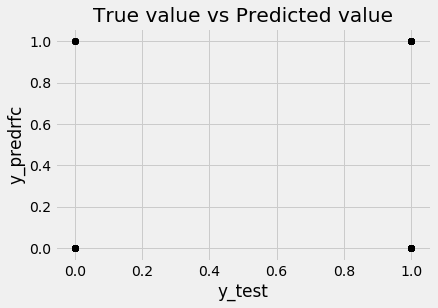

In [205]:
plt.scatter(y_test, y_predrfc, color = 'black')
plt.xlabel('y_test')
plt.ylabel('y_predrfc')
plt.title('True value vs Predicted value')
plt.grid(True)
plt.style.use('fivethirtyeight')

##### Naive Bayes

In [233]:
gnb = GaussianNB()

In [234]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [235]:
gnb.score(X_test, y_test)

0.7798507462686567

In [104]:
acc_gnb = round(gnb.score(X_test, y_test) * 100, 2)
acc_gnb

77.99

In [202]:
y_predgnb = gnb.predict(X_test)

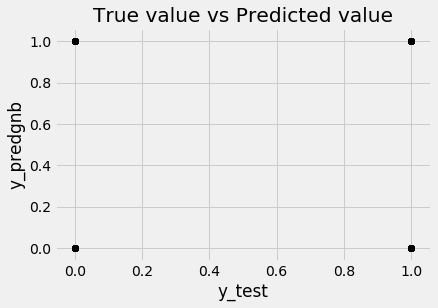

In [203]:
plt.scatter(y_test, y_predgnb, color = 'black')
plt.xlabel('y_test')
plt.ylabel('y_predgnb')
plt.title('True value vs Predicted value')
plt.grid(True)
plt.style.use('fivethirtyeight')

##### Decision Tree Classifier

In [110]:
dtc = GridSearchCV(DecisionTreeClassifier(),{
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2,10,20]
}, cv = 5, return_train_score = False)
dtc.fit(X_train, y_train)
dtc.cv_results_

{'mean_fit_time': array([0.00338979, 0.01295786, 0.00378709, 0.00119662, 0.00279212,
        0.00159707, 0.00439453, 0.00140262, 0.00399022, 0.0009973 ,
        0.00378833, 0.00098996]),
 'std_fit_time': array([4.88753793e-04, 2.14338172e-02, 7.45110409e-04, 3.97095717e-04,
        3.98283899e-04, 8.00866406e-04, 4.81893269e-04, 4.84788569e-04,
        6.30828553e-04, 2.37941264e-06, 3.99758973e-04, 1.40520602e-05]),
 'mean_score_time': array([0.00100546, 0.00059881, 0.0008019 , 0.0003974 , 0.00039859,
        0.00099487, 0.00059829, 0.        , 0.00019956, 0.        ,
        0.00019956, 0.00020013]),
 'std_score_time': array([1.43062273e-05, 4.88928756e-04, 7.47791983e-04, 4.86711647e-04,
        4.88168975e-04, 5.76046128e-06, 4.88502426e-04, 0.00000000e+00,
        3.99112701e-04, 0.00000000e+00, 3.99112701e-04, 4.00257111e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'en

In [111]:
dfdtc = pd.DataFrame(dtc.cv_results_)
dfdtc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003390,0.000489,0.001005,0.000014,gini,2,best,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.777778,0.800,0.758065,0.733871,0.717742,0.757624,0.029519,10
1,0.012958,0.021434,0.000599,0.000489,gini,2,random,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.761905,0.768,0.677419,0.782258,0.750000,0.747994,0.036678,12
2,0.003787,0.000745,0.000802,0.000748,gini,10,best,"{'criterion': 'gini', 'min_samples_split': 10,...",0.873016,0.816,0.806452,0.774194,0.750000,0.804173,0.041840,1
3,0.001197,0.000397,0.000397,0.000487,gini,10,random,"{'criterion': 'gini', 'min_samples_split': 10,...",0.753968,0.792,0.782258,0.766129,0.782258,0.775281,0.013565,8
4,0.002792,0.000398,0.000399,0.000488,gini,20,best,"{'criterion': 'gini', 'min_samples_split': 20,...",0.873016,0.816,0.725806,0.790323,0.766129,0.794543,0.049421,3


In [112]:
dfdtc[['param_min_samples_split', 'param_splitter', 'param_criterion', 'mean_test_score']]

,param_min_samples_split,param_splitter,param_criterion,mean_test_score
0,2,best,gini,0.757624
1,2,random,gini,0.747994
2,10,best,gini,0.804173
3,10,random,gini,0.775281
4,20,best,gini,0.794543
5,20,random,gini,0.778491
6,2,best,entropy,0.749599
7,2,random,entropy,0.778491
8,10,best,entropy,0.762440
9,10,random,entropy,0.781701


In [113]:
dir(dtc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score',
 'scorer_',
 'scoring',
 '

In [114]:
dtc.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_spl

In [115]:
dtc = DecisionTreeClassifier(min_samples_split = 20, splitter = 'random', criterion = 'entropy')

In [116]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [117]:
dtc.score(X_test, y_test)

0.7947761194029851

In [118]:
acc_dtc = round(dtc.score(X_test, y_test) * 100, 2)
acc_dtc

79.48

In [199]:
y_preddtc = dtc.predict(X_test)

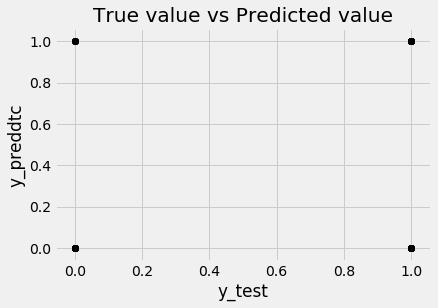

In [200]:
plt.scatter(y_test, y_preddtc, color = 'black')
plt.xlabel('y_test')
plt.ylabel('y_preddtc')
plt.title('True value vs Predicted value')
plt.grid(True)
plt.style.use('fivethirtyeight')

##### K Neighbors Classifier

In [147]:
knc = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [5,10,20],
    'weights': ['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}, cv = 5, return_train_score = False)
knc.fit(X_train, y_train)
knc.cv_results_

{'mean_fit_time': array([0.00158939, 0.00159402, 0.00159554, 0.00159583, 0.00139623,
        0.0019948 , 0.00119677, 0.00159578, 0.00159621, 0.00139627,
        0.00139604, 0.00099745, 0.00119033, 0.00100341, 0.00099807,
        0.00119781, 0.00139561, 0.00279512, 0.00079761, 0.0012023 ,
        0.00079689, 0.00119662, 0.00079765, 0.00019927]),
 'std_fit_time': array([8.02894162e-04, 7.95341787e-04, 4.88172189e-04, 4.88208196e-04,
        4.87702192e-04, 6.31354553e-04, 3.98445215e-04, 4.87488433e-04,
        4.88519657e-04, 4.87663569e-04, 4.88344147e-04, 6.67572021e-07,
        4.03661077e-04, 1.55981882e-05, 3.16297988e-07, 3.99828654e-04,
        4.88987999e-04, 1.93228090e-03, 3.98805790e-04, 9.86838599e-04,
        3.98450408e-04, 3.99113527e-04, 3.98831816e-04, 3.98540497e-04]),
 'mean_score_time': array([0.01097589, 0.00378923, 0.01436172, 0.00478735, 0.0191483 ,
        0.00698123, 0.01476059, 0.00418863, 0.011169  , 0.00438857,
        0.0113688 , 0.00339055, 0.00719514, 0.00

In [148]:
dfknc = pd.DataFrame(knc.cv_results_)
dfknc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001589,0.000803,0.010976,0.002448,auto,5,uniform,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.817460,0.792,0.782258,0.854839,0.838710,0.817014,0.027285,9
1,0.001594,0.000795,0.003789,0.001162,auto,5,distance,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.817460,0.776,0.782258,0.854839,0.838710,0.813804,0.030759,13
2,0.001596,0.000488,0.014362,0.002930,auto,10,uniform,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.841270,0.824,0.774194,0.830645,0.830645,0.820225,0.023609,1
3,0.001596,0.000488,0.004787,0.001324,auto,10,distance,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.833333,0.816,0.782258,0.838710,0.830645,0.820225,0.020368,1
4,0.001396,0.000488,0.019148,0.009343,auto,20,uniform,"{'algorithm': 'auto', 'n_neighbors': 20, 'weig...",0.825397,0.824,0.766129,0.798387,0.822581,0.807384,0.022844,17


In [149]:
dfknc[['param_algorithm', 'param_n_neighbors', 'param_weights', 'mean_test_score']].head()

,param_algorithm,param_n_neighbors,param_weights,mean_test_score
0,auto,5,uniform,0.817014
1,auto,5,distance,0.813804
2,auto,10,uniform,0.820225
3,auto,10,distance,0.820225
4,auto,20,uniform,0.807384


In [161]:
dir(knc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'outputs_2d_',
 'p',
 'predict',
 'predict_proba',
 'radius',
 'score',
 'set_params',
 'weights']

In [163]:
knc.score

<bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')>

In [164]:
knc = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, weights = 'distance')

In [165]:
knc.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [166]:
knc.score(X_test, y_test)

0.8022388059701493

In [145]:
acc_knc = round(knc.score(X_test, y_test) * 100, 2)
acc_knc

80.22

In [137]:
y_predknc = knc.predict(X_test)

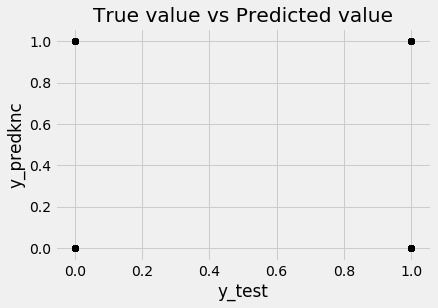

In [198]:
plt.scatter(y_test, y_predknc, color = 'black')
plt.xlabel('y_test')
plt.ylabel('y_predknc')
plt.title('True value vs Predicted value')
plt.grid(True)
plt.style.use('fivethirtyeight')

##### Stochastic Gradient Descent

In [167]:
sgd = GridSearchCV(SGDClassifier(),{
    'loss': ['hinge', 'perceptron'],
    'alpha': [0.0001,0.001,0.1]
}, cv = 5, return_train_score = False)
sgd.fit(X_train, y_train)
sgd.cv_results_

{'mean_fit_time': array([0.02553124, 0.00340142, 0.00277858, 0.00279322, 0.00140281,
        0.00100594]),
 'std_fit_time': array([4.16054185e-02, 4.94966470e-04, 3.90828586e-04, 7.46520782e-04,
        4.84627726e-04, 1.21657971e-05]),
 'mean_score_time': array([0.00059862, 0.00058947, 0.        , 0.00039849, 0.00039983,
        0.00039859]),
 'std_score_time': array([0.00079838, 0.00048148, 0.        , 0.00048805, 0.00048969,
        0.00048817]),
 'param_alpha': masked_array(data=[0.0001, 0.0001, 0.001, 0.001, 0.1, 0.1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_loss': masked_array(data=['hinge', 'perceptron', 'hinge', 'perceptron', 'hinge',
                    'perceptron'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001, 'loss': 'hinge'},
  {'alpha': 0.0001, 'loss': 'perceptron'},
  {'alpha': 0.001, 'loss'

In [168]:
dfsgd = pd.DataFrame(sgd.cv_results_)
dfsgd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025531,0.041605,0.000599,0.000798,0.0001,hinge,"{'alpha': 0.0001, 'loss': 'hinge'}",0.841270,0.792,0.709677,0.741935,0.766129,0.770465,0.044813,3
1,0.003401,0.000495,0.000589,0.000481,0.0001,perceptron,"{'alpha': 0.0001, 'loss': 'perceptron'}",0.690476,0.712,0.620968,0.766129,0.798387,0.717496,0.061493,6
2,0.002779,0.000391,0.000000,0.000000,0.001,hinge,"{'alpha': 0.001, 'loss': 'hinge'}",0.849206,0.848,0.733871,0.774194,0.838710,0.808989,0.046609,1
3,0.002793,0.000747,0.000398,0.000488,0.001,perceptron,"{'alpha': 0.001, 'loss': 'perceptron'}",0.611111,0.800,0.741935,0.750000,0.782258,0.736758,0.066691,4
4,0.001403,0.000485,0.000400,0.000490,0.1,hinge,"{'alpha': 0.1, 'loss': 'hinge'}",0.833333,0.816,0.733871,0.806452,0.830645,0.804173,0.036391,2
5,0.001006,0.000012,0.000399,0.000488,0.1,perceptron,"{'alpha': 0.1, 'loss': 'perceptron'}",0.619048,0.720,0.733871,0.774194,0.782258,0.725522,0.058524,5


In [183]:
dir(sgd)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_allocate_parameter_mem',
 '_check_proba',
 '_estimator_type',
 '_expanded_class_weight',
 '_fit',
 '_fit_binary',
 '_fit_multiclass',
 '_get_learning_rate_type',
 '_get_loss_function',
 '_get_param_names',
 '_get_penalty_type',
 '_get_tags',
 '_make_validation_score_cb',
 '_make_validation_split',
 '_partial_fit',
 '_predict_log_proba',
 '_predict_proba',
 '_predict_proba_lr',
 '_validate_params',
 '_validate_sample_weight',
 'alpha',
 'average',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'early_stopping',
 'eps

In [184]:
sgd.score

<bound method ClassifierMixin.score of SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>

In [215]:
sgd = SGDClassifier(alpha = 0.01, loss = 'hinge')

In [216]:
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [217]:
sgd.score(X_test, y_test)

0.746268656716418

In [188]:
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd 

74.63

In [189]:
y_predsgd = sgd.predict(X_test)

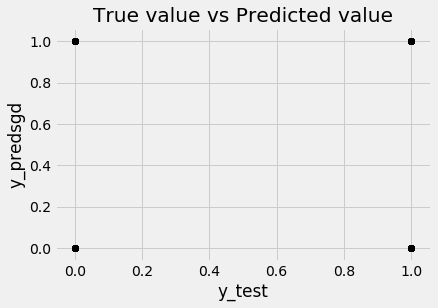

In [196]:
plt.scatter(y_test, y_predsgd, color = 'black')
plt.xlabel('y_test')
plt.ylabel('y_predsgd')
plt.title('True value vs Predicted value')
plt.grid(True)
plt.style.use('fivethirtyeight')

##### All of the algorithm performed above is listed in descending order

In [191]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNC', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svm, acc_knc, acc_logistic, 
              acc_rfc, acc_gnb ,
              acc_sgd,  acc_dtc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,81.34
3,Random Forest,81.34
1,KNC,80.22
6,Decision Tree,79.48
2,Logistic Regression,77.99
4,Naive Bayes,77.99
5,Stochastic Gradient Decent,74.63


##### Therefore, prediction will be more accurate if we use
##### Support Vector Machines or Random Forest Classifier